# Effective Quadrature Integration Rules

In [1]:
%matplotlib inline
from equadratures import *
import numpy as np

<h2> Bivariate integration </h2>

The objective of this python notebook is to demonstrate how we can perform numerical integration using effective quadratures. Consider the following definite integral
$$\int_{-1}^{1} \int_{-1}^{1} exp(x_1 + x_2) \rho(x_1, x_2),$$

where $\rho(x_1, x_2)$ is the uniform distribution over the hypercube $[-1,1]^2$. 

There are three simple ingredients to computing this bi-variate integral. Step zero is to define this as a function call in python. 

In [2]:
def function(x):
    return np.exp(x[0] + x[1])

The first step is then to select the type of parameters and the order of the quadrature rule that is to be used. We use a uniform parameter between -1 and 1 (as these are the integration bounds) with order 10 (11 points in each direction).

In [3]:
x1 = Parameter(param_type="Uniform", lower=-1, upper=1, points=11)
x2 = Parameter(param_type="Uniform", lower=-1, upper=1, points=11)
params = [x1, x2]

Excellent! Now let's pick an appropriate polynomial basis and set the order to be 10. For details on what kinds of polynomial basis are available, please consult the documentation tab in www.effective-quadratures.org. Here we will use a Euclidean degree. 

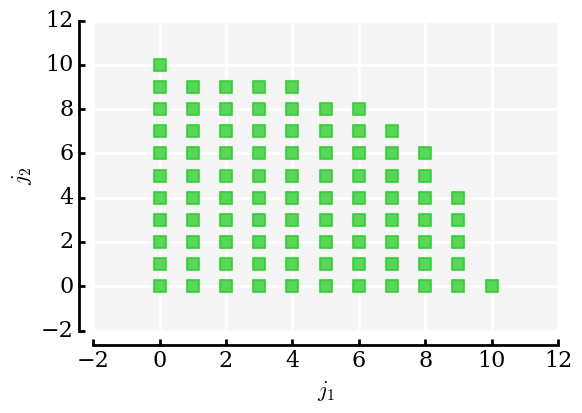

In [4]:
euclid = IndexSet('Euclidean degree', [10,10])
euclid.plot()

Bravo! Now let us use some utilities from the EffectiveSubsampling class (the constructor of this class requires an index set and the parameters)

In [5]:
E = Polylsq(params, euclid)

As part of step 3, we need to set the number of function calls this `E' object can make whilst its trying to compute the integral. We usually set this to be the number of basis terms.

In [6]:
E.set_no_of_evals(E.no_of_basis_terms)

And finally, our integral can be approximated as:

In [7]:
integral_approximation = E.integrate(function)
print integral_approximation

1.3810978455


which is pretty close to the analytic result of $1/4 \times( (exp(-2) + exp(2) - 2 )= 1.3810978455418$. Voila! The points corresponding to this integration rule can be visualized using the following command:

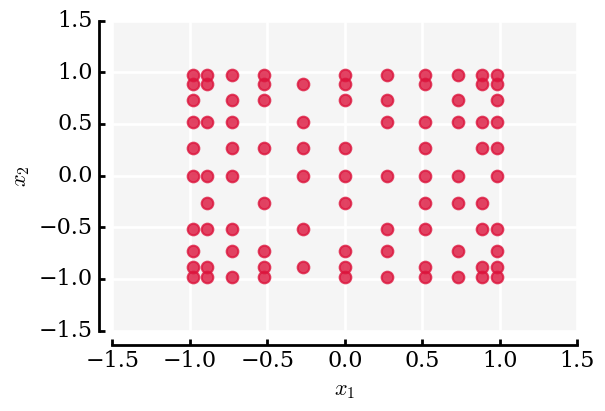

In [8]:
plotting.scatterplot(E.subsampled_quadrature_points[:,0], E.subsampled_quadrature_points[:,1], 
            '$x_1$', '$x_2$', marker_type='o', color_choice='crimson', filename='out.eps')